# **Association Rules Exploration in Credit Score Classification Dataset: Unveiling Patterns in Credit Types**

Association rules in data mining and machine learning are principles aimed at revealing meaningful relationships or patterns within extensive datasets. These rules typically take the form of conditional statements, articulating associations between different variables or items in the dataset. The primary application of association rules lies in the analysis of transactional data, offering insights into connections and dependencies within the information. The Apriori algorithm is commonly employed to extract association rules by identifying frequent itemsets in the dataset, showcasing recurring patterns of co-occurring items. Overall, association rules play a vital role in uncovering valuable knowledge from large datasets across diverse domains.

In the context of Association Rules analysis, we are leveraging the Credit Score dataset, accessible at https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data. Our objective is to unveil patterns within the dataset pertaining to different credit score types. The focal column for this investigation is denoted by 'Credit_Score,' which classifies scores into three distinct values: 'Poor,' 'Standard,' and 'Good.'


In [ ]:
# Install Packages
install.packages("arules")
install.packages("arulesViz")

# Load Libraries
library(arulesViz)
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘cpp11’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: arules

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
# Read CSV file into a data frame
credit_df <- read.csv("/content/sample_data/credit_data.csv")

In [ ]:
head(credit_df)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,5634,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Standard,809.98,26.82262,265.0000,No,49.57495,80.41530,High_spent_Small_value_payments,312.4941,Good
2,5635,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,⋯,Good,809.98,31.94496,221.1954,No,49.57495,118.28022,Low_spent_Large_value_payments,284.6292,Good
3,5636,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4194.171,3,⋯,Good,809.98,28.60935,267.0000,No,49.57495,81.69952,Low_spent_Medium_value_payments,331.2099,Good
4,5637,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,⋯,Good,809.98,31.37786,268.0000,No,49.57495,199.45807,Low_spent_Small_value_payments,223.4513,Good
5,5638,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,269.0000,No,49.57495,41.42015,High_spent_Medium_value_payments,341.4892,Good
6,5639,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,⋯,Good,809.98,27.26226,270.0000,No,49.57495,62.43017,Low_spent_Small_value_payments,340.4792,Good


In [ ]:
str(credit_df)

'data.frame':	100000 obs. of  28 variables:
 $ ID                      : num  5634 5635 5636 5637 5638 ...
 $ Customer_ID             : chr  "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" ...
 $ Month                   : chr  "January" "February" "March" "April" ...
 $ Name                    : chr  "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" ...
 $ Age                     : num  23 23 -500 23 23 23 23 23 28 28 ...
 $ SSN                     : chr  "821-00-0265" "821-00-0265" "821-00-0265" "821-00-0265" ...
 $ Occupation              : chr  "Scientist" "Scientist" "Scientist" "Scientist" ...
 $ Annual_Income           : num  19114 19114 19114 19114 19114 ...
 $ Monthly_Inhand_Salary   : num  1825 4194 4194 4194 1825 ...
 $ Num_Bank_Accounts       : int  3 3 3 3 3 3 3 3 2 2 ...
 $ Num_Credit_Card         : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate           : int  3 3 3 3 3 3 3 3 6 6 ...
 $ Num_of_Loan             : num  4 4 4 4 4 4 4 4 1 1 ...
 $ Type_of_Loan  

The Apriori algorithm is a data mining algorithm used for discovering frequent itemsets in a dataset of categorical data, typically used for association rule mining. However, if you have numerical data that you want to use with the Apriori algorithm, you can discretize it and convert it into categorical variables.

Here's a step-by-step explanation:

**Discretization:**
Numerical data is continuous, but Apriori works well with categorical data. Discretization involves dividing the range of numerical values into intervals or bins.

**Create Bins:**
Decide on the number of bins you want to create. You can use various methods like equal-width binning or equal-frequency binning.

**Assign Categories:**
Assign each numerical value to the appropriate bin. This effectively converts the numerical column into a categorical one.

**Label Encoding**:
Optionally, you can perform label encoding, which is assigning a unique label (integer or categorical label) to each bin. This is important if your algorithm requires categorical variables to be represented as integers.
Apply Apriori Algorithm:

then, you can apply the Apriori algorithm on the dataset with the transformed categorical variables.



To apply the Apriori algorithm to the credit score dataset, all numerical columns were transformed into categorical columns.

In [ ]:
# Create a new categorical variable 'Age_Category' based on the 'Age' column
credit_df$Age_Category <- cut(credit_df$Age, breaks = c(0, 13, 18, 35, 56), labels = c("Children", "Young Adults", "Adults", "Elderly"), include.lowest = TRUE)


In [ ]:
# Specify the breaks and labels for categorizing annual income
income_breaks <- c(7000, 30000, 55000, 82000)
income_labels <- c("Low", "Medium", "High")

# Use the 'cut' function to create a new categorical variable 'Annual_Income_Category'  based on the 'Annual_Income' column
credit_df$Annual_Income_Category <- cut(credit_df$Annual_Income, breaks = income_breaks, labels = income_labels, include.lowest = TRUE)

In [ ]:
breaks <- c(300, 2000, 4000, 6200)

# Create labels for the categories
labels <- c('Low', 'Medium', 'High')

# Cut the Monthly_Inhand_Salary into categories
credit_df$Monthly_Inhand_Salary_Category <- cut(credit_df$Monthly_Inhand_Salary, breaks = breaks, labels = labels, include.lowest = TRUE)


In [ ]:
# Use the 'cut' function to create a new categorical variable 'Outstanding_Debt_Category'  based on the 'Outstanding_Debt' column
credit_df$Outstanding_Debt_Category <- cut(credit_df$Outstanding_Debt,
                                    breaks = c(0.20, 800, 1600, 2440),
                                    labels = c("Low", "Medium", "High"),
                                    include.lowest = TRUE)

In [ ]:
# Use the 'cut' function to create a new categorical variable 'Credit_Utilization_Ratio_Category'  based on the 'Credit_Utilization_Ratio' column
credit_df$Credit_Utilization_Ratio_Category <- cut(credit_df$Credit_Utilization_Ratio,
                                      breaks = c(19, 21, 23, 26),
                                      labels = c("Low", "Medium", "High"),
                                      include.lowest = TRUE)

In [ ]:
# Use the 'cut' function to create a new categorical variable 'Credit_History_Age_Category'  based on the 'Credit_History_Age' column
credit_df$Credit_History_Age_Category <- cut(credit_df$Credit_History_Age,
                                      breaks = c(0, 135, 270, 405),
                                      labels = c("Low", "Medium", "High"),
                                      include.lowest = TRUE)

In [ ]:
# Use the 'cut' function to create a new categorical variable 'Total_EMI_Category'  based on the 'Total_EMI' column
credit_df$Total_EMI_Category <- cut(credit_df$Total_EMI_per_month,
                             breaks = c(0, 75.33, 150.67, 226),
                             labels = c("Low", "Medium", "High"),
                             include.lowest = TRUE)

In [ ]:
# Use the 'cut' function to create a new categorical variable 'Monthly_Balance_Category'  based on the 'Monthly_Balance' column
credit_df$Monthly_Balance <- as.numeric(as.character(credit_df$Monthly_Balance))

credit_df$Monthly_Balance_Category <- cut(credit_df$Monthly_Balance, breaks = c(-Inf, 0, 100, Inf), labels = c("Low", "Medium", "High"))


In [ ]:
# Use the 'cut' function to create a new categorical variable 'Amount_invested_monthly_categories'  based on the 'Amount_invested_monthly' column
credit_df$Amount_invested_monthly_categories <- cut(credit_df$Amount_invested_monthly,
                                                     breaks = c(0, 15, 30, 46),
                                                     labels = c("Low", "Medium", "High"),
                                                     include.lowest = TRUE)

In [ ]:
credit_df$Num_Bank_Accounts <- as.character(credit_df$Num_Bank_Accounts)
credit_df$Num_Credit_Card <- as.character(credit_df$Num_Credit_Card)
credit_df$Interest_Rate <- as.character(credit_df$Interest_Rate)
credit_df$Delay_from_due_date <- as.character(credit_df$Delay_from_due_date)
credit_df$Num_of_Loan <- as.character(credit_df$Num_of_Loan)
credit_df$Num_of_Delayed_Payment <- as.character(credit_df$Num_of_Delayed_Payment)
credit_df$Num_Credit_Inquiries <- as.character(credit_df$Num_Credit_Inquiries)

In [ ]:
credit_df$Credit_Score <- as.factor(credit_df$Credit_Score)

In [ ]:
# Drop the numrical coulmns
columns_to_exclude <- c("ID", "Customer_ID", "Name", "SSN", "Age", "Annual_Income",
                         "Monthly_Inhand_Salary", "Credit_Utilization_Ratio",
                         "Outstanding_Debt", "Credit_History_Age",
                         "Total_EMI_per_month", "Monthly_Balance","Amount_invested_monthly")

# Exclude specified columns
credit_df <- credit_df[, -which(names(credit_df) %in% columns_to_exclude)]


In [ ]:
str(credit_df)

'data.frame':	100000 obs. of  24 variables:
 $ Month                             : chr  "January" "February" "March" "April" ...
 $ Occupation                        : chr  "Scientist" "Scientist" "Scientist" "Scientist" ...
 $ Num_Bank_Accounts                 : chr  "3" "3" "3" "3" ...
 $ Num_Credit_Card                   : chr  "4" "4" "4" "4" ...
 $ Interest_Rate                     : chr  "3" "3" "3" "3" ...
 $ Num_of_Loan                       : chr  "4" "4" "4" "4" ...
 $ Type_of_Loan                      : chr  "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan" "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan" "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan" "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan" ...
 $ Delay_from_due_date               : chr  "3" "-1" "3" "5" ...
 $ Num_of_Delayed_Payment            : chr  "7" "30.9233424374718" "7" "4" ...
 $ Changed_Credit_Limit              : num  11.


To better understand which patterns influence the type of credit score received, the data for each score type is separated, and the Apriori algorithm is applied to the subsets of the score data for more insightful analysis.

## **Rules for Good**

A subset of the credit dataset is isolated to focus exclusively on instances where the credit score is labeled as "Good." This subset, named good_credit_df, is then subjected to the Apriori algorithm, a data mining technique that identifies association rules between different variables. The resulting set of association rules, denoted as association_rules_A, is inspected to reveal patterns and dependencies among various features associated with the occurrence of a good credit score. The 'inspect' function is employed to explore and interpret these rules, offering insights into the factors contributing to positive credit outcomes within the specific context of a good credit score. This analysis aids in understanding the underlying relationships and conditions influencing creditworthiness in the dataset.






In [ ]:
# Investigating Association Rules for Good Credit Scores
good_credit_df <- credit_df[credit_df$Credit_Score == "Good", ]


# The Apriori algorithm is then applied to mine association rules within this subset.
association_rules_A <- apriori(good_credit_df)

# The 'inspect' function is used to display and explore the discovered association rules.
inspect(association_rules_A)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 not logical or factor. Applying default discretization (see '? discretizeDF').”


Streaming output truncated to the last 5000 lines.
        Monthly_Balance_Category=High}                       => {Payment_of_Min_Amount=No}              0.3760377  0.8850165 0.4248934 0.9913341  6704
[2034] {Age_Category=Elderly,                                                                                                                         
        Outstanding_Debt_Category=Low,                                                                                                                
        Credit_History_Age_Category=High}                    => {Payment_of_Min_Amount=No}              0.1536908  0.9471137 0.1622728 1.0608911  2740
[2035] {Age_Category=Elderly,                                                                                                                         
        Outstanding_Debt_Category=Low,                                                                                                                
        Credit_History_Age_Category=High}  

The summary output provides a comprehensive overview of the association rules mined using the Apriori algorithm on the subset of the dataset with a "Good" credit score. The rule length distribution indicates that the rules range from one to seven elements, with the majority falling between three and five. The quality measures summary reveals information about the support, confidence, coverage, and lift of the rules. The minimum support is 0.1002, and the minimum confidence is 0.8019, suggesting that the rules are relatively well-supported and confident. The lift, which indicates the strength of association between antecedent and consequent, ranges from 0.8993 to 4.7424. The count column provides the number of transactions that satisfy each rule.

In terms of mining info, it indicates that the analysis was performed on the "good_credit_df" dataset with 17,828 transactions and a minimum support threshold of 0.1 and a minimum confidence threshold of 0.8. The call details the Apriori algorithm used for the analysis.

In summary, the association rules reveal patterns in the data related to a "Good" credit score, providing insights into the relationships and conditions associated with positive credit outcomes. The analysis considers support, confidence, coverage, and lift metrics to assess the strength and relevance of the discovered rules

In [ ]:
summary(association_rules_A)

set of 3236 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4    5    6    7 
   3  178  763 1194  828  248   22 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.081   5.000   7.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.1002   Min.   :0.8019   Min.   :0.1002   Min.   :0.8993  
 1st Qu.:0.1140   1st Qu.:0.9473   1st Qu.:0.1182   1st Qu.:1.0000  
 Median :0.1346   Median :0.9810   Median :0.1384   Median :1.0066  
 Mean   :0.1628   Mean   :0.9652   Mean   :0.1690   Mean   :1.2055  
 3rd Qu.:0.1737   3rd Qu.:1.0000   3rd Qu.:0.1808   3rd Qu.:1.0577  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :4.7424  
     count      
 Min.   : 1786  
 1st Qu.: 2032  
 Median : 2400  
 Mean   : 2902  
 3rd Qu.: 3096  
 Max.   :17828  

mining info:
           data ntransactions support confidence                           call
 good_credit_df         17828     0.1    

The provided R code generates a scatterplot to visually represent association rules obtained from the Apriori algorithm applied to a subset of the credit dataset where the credit score is labeled as "Good."

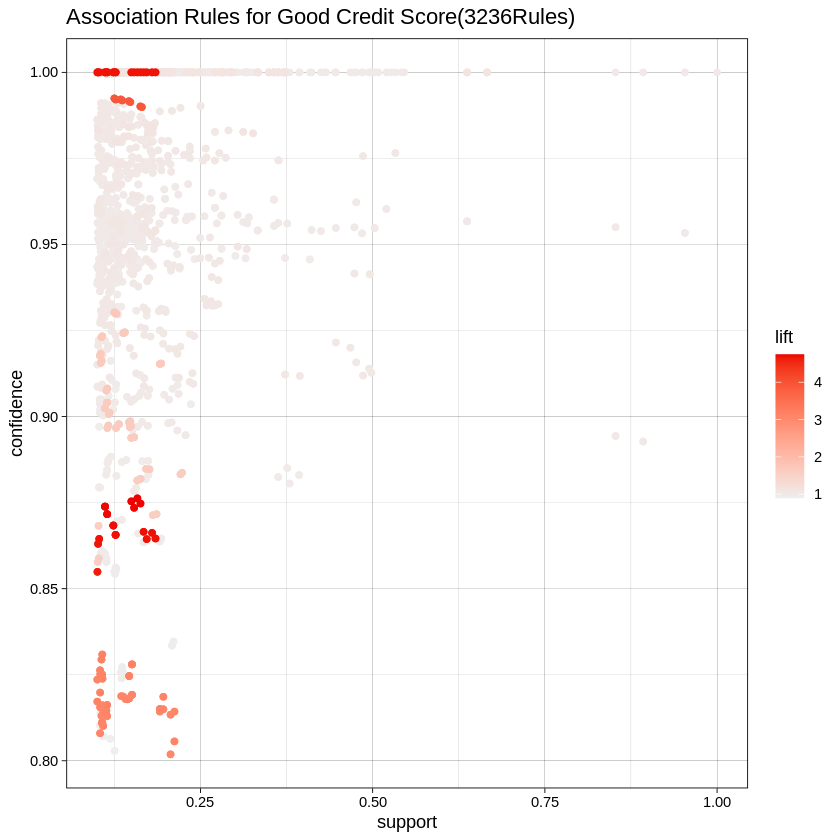

In [ ]:
# General Plot for  Good Credit Score
num_rules <- length(association_rules_A)
plot(association_rules_A, method = "scatterplot", jitter = 0, main = paste("Association Rules for Good Credit Score(", num_rules, "Rules)", sep = ""))



To uncover patterns closely associated with a "Good" credit score within a subset of the credit dataset, the Apriori algorithm was applied with a focus on strong association rules. Setting the minimum support (supp) to 0.4 ensures that only rules supported by at least 40% of the instances in the dataset are considered. Additionally, a minimum confidence (conf) of 0.9 is specified, ensuring that the extracted rules exhibit a high level of accuracy in predicting a "Good" credit score. By using the appearance parameter to filter rules based on the right-hand side (rhs) being "Credit_Score=Good," the analysis hones in on associations specifically related to positive credit outcomes. This approach helps identify significant patterns and dependencies between various features that contribute to a favorable credit score, providing valuable insights for decision-making in credit assessment.


The output includes a total of 30 rules, each presented with details such as the left-hand side (lhs), right-hand side (rhs), support, confidence, coverage, lift, and count.





In [ ]:
# rules for  Good Credit Score with supp=.4, conf=.9
rules_good <- apriori(good_credit_df,,parameter = list(supp=.4, conf=.9),appearance=list(rhs=c("Credit_Score=Good")))
inspect(rules_good)


Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7131 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[3106 item(s), 17828 transaction(s)] done [0.21s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                      rhs                   support confidence  coverage lift count
[1]  {}                                    => {Credit_Score=Good} 1.0000000          1 1.0000000    1 17828
[2]  {Age_Category=Adults}                 => {Credit_Score=Good} 0

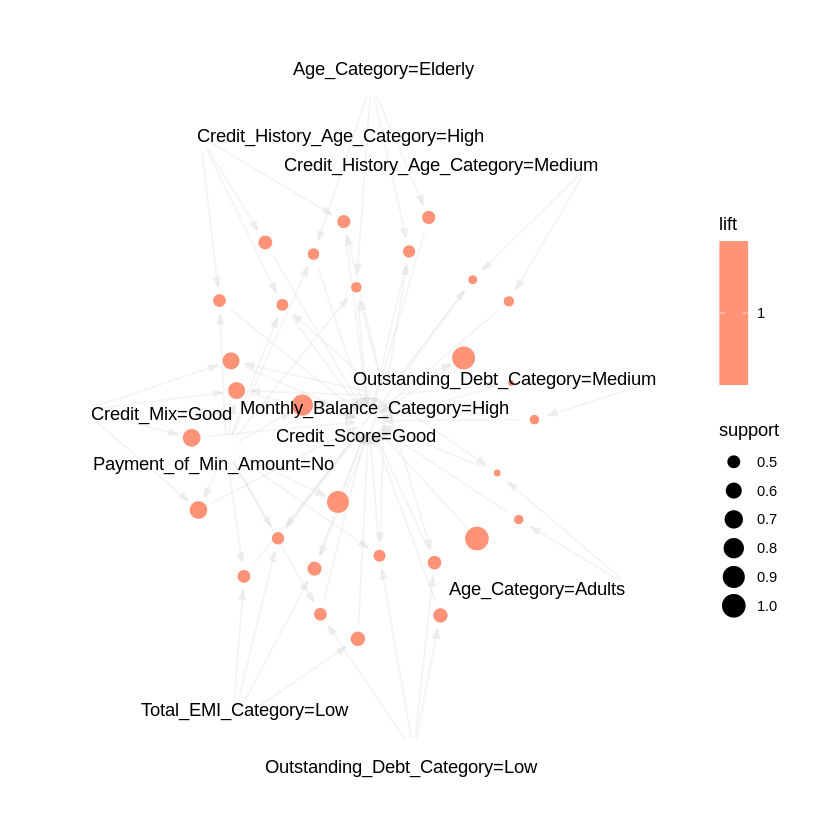

In [ ]:
plot(rules_good, method = "graph")

## **Standard Rules**


Applying the same analytical procedure, the Apriori algorithm was utilized to examine association rules within a subset of the credit dataset, focusing on instances where the credit score is categorized as "Standard."

In [ ]:
# Checking assocation rules for STD Credit Score
std_credit_df <- credit_df[credit_df$Credit_Score == "Standard", ]


# Apply the Apriori algorithm to mine association rules
association_rules_B <- apriori(std_credit_df)
inspect(association_rules_B)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 not logical or factor. Applying default discretization (see '? discretizeDF').”


Streaming output truncated to the last 5000 lines.
        Monthly_Balance_Category=High}                       => {Credit_Score=Standard}               0.1247414  1.0000000 0.1247414 1.0000000  6633
[179]  {Month=March,                                                                                                                                
        Credit_Score=Standard}                               => {Monthly_Balance_Category=High}       0.1247414  0.9523331 0.1309851 0.9977609  6633
[180]  {Num_Credit_Inquiries=4,                                                                                                                     
        Credit_Mix=Standard}                                 => {Credit_Score=Standard}               0.1014970  1.0000000 0.1014970 1.0000000  5397
[181]  {Num_Credit_Inquiries=4,                                                                                                                     
        Monthly_Balance_Category=High}                 

In [ ]:
summary(association_rules_B)

set of 1819 rules

rule length distribution (lhs + rhs):sizes
  1   2   3   4   5   6   7 
  2 132 512 707 392  70   4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.869   5.000   7.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.1000   Min.   :0.8000   Min.   :0.1000   Min.   :0.9545  
 1st Qu.:0.1118   1st Qu.:0.9552   1st Qu.:0.1177   1st Qu.:1.0000  
 Median :0.1288   Median :0.9868   Median :0.1360   Median :1.0017  
 Mean   :0.1566   Mean   :0.9625   Mean   :0.1628   Mean   :1.1979  
 3rd Qu.:0.1708   3rd Qu.:1.0000   3rd Qu.:0.1770   3rd Qu.:1.0341  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :7.2485  
     count      
 Min.   : 5318  
 1st Qu.: 5944  
 Median : 6850  
 Mean   : 8325  
 3rd Qu.: 9084  
 Max.   :53174  

mining info:
          data ntransactions support confidence                          call
 std_credit_df         53174     0.1        0.8 apriori(d

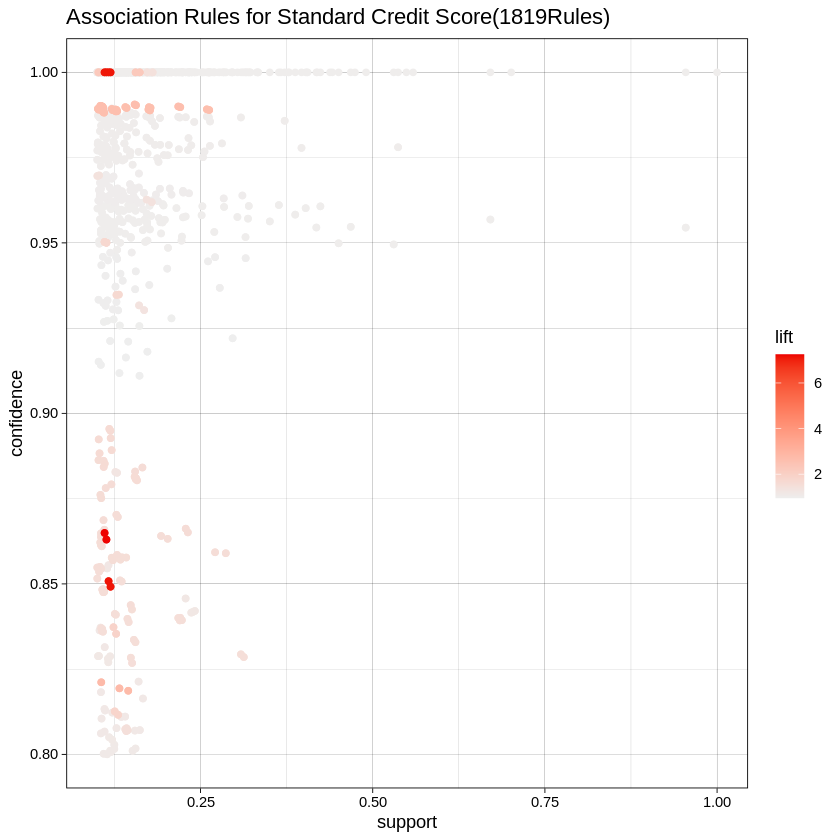

In [ ]:
# General Plot for  Standard Credit Score
num_rules <- length(association_rules_A)
plot(association_rules_A, method = "scatterplot", jitter = 0, main = paste("Association Rules for Standard Credit Score(", num_rules, "Rules)", sep = ""))


In [ ]:
# rules for  Standard Credit Score with supp=.4, conf=.9
rules_std <- apriori(std_credit_df,parameter = list(supp=.4, conf=.9),appearance=list(rhs=c("Credit_Score=Standard")))
inspect(rules_std)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 21269 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[9579 item(s), 53174 transaction(s)] done [0.39s].
sorting and recoding items ... [10 item(s)] done [0.01s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [20 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     lhs                                      rhs                       support confidence  coverage lift count
[1]  {}                                    => {Credit_Score=Standard} 1.0000000          1 1.0000000    1 53174
[2]  {Outstanding_Debt_Category=Low}       => {Credit_Scor

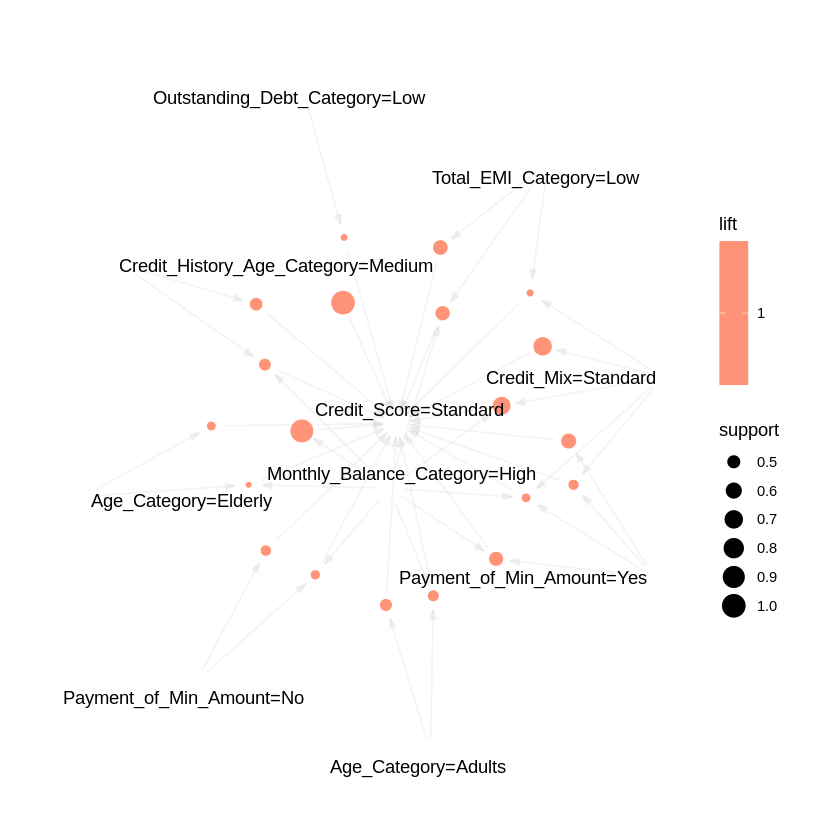

In [ ]:
plot(rules_std, method = "graph")